In [ ]:
!pip uninstall tensorflow
!pip install tensorflow==1.14.0
!pip install keras==2.3.1

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.0
     |████████████████████████████████| 109.3 MB 1.2 MB/s 
     |████████████████████████████████| 3.1 MB 39.0 MB/s 
     |████████████████████████████████| 488 kB 49.4 MB/s 
     |████████████████████████████████| 50 kB 5.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.

In [ ]:
import keras
from keras.utils import np_utils
import os,cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import  *
from tensorflow.keras import layers
import gym
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
!pip install stable-baselines
'''Stable-baselines provides a set of default policies, that can be used with most action spaces.
To customize the default policies, you can specify the policy_kwargs parameter to the model class you use.
Those kwargs are then passed to the policy on instantiation (see Custom Policy Network for an example).
If you need more control on the policy architecture, you can also create a custom policy (see Custom Policy Network).'''


     |████████████████████████████████| 240 kB 5.2 MB/s 


'Stable-baselines provides a set of default policies, that can be used with most action spaces. \nTo customize the default policies, you can specify the policy_kwargs parameter to the model class you use. \nThose kwargs are then passed to the policy on instantiation (see Custom Policy Network for an example). \nIf you need more control on the policy architecture, you can also create a custom policy (see Custom Policy Network).'

In [ ]:
from tqdm.notebook import trange
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from gym import spaces
from stable_baselines import DQN
from stable_baselines.common.vec_env import DummyVecEnv
# from stable_baselines.deepq.policies import CnnPolicy
from stable_baselines.deepq.policies import LnCnnPolicy
from tensorflow.keras.models import *

from tensorflow.keras.models import *
from sklearn.metrics import confusion_matrix
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! unzip "/content/drive/MyDrive/auglymphnode.zip" > /dev/null

In [ ]:
Folder_Path_CT = r"/content/Dhana & Praneeth/"

Folder_list_CT = os.listdir(Folder_Path_CT)

img_path_CC = r"/content/Dhana & Praneeth/malignant selected_3000/"

img_list_CC = os.listdir(img_path_CC)

In [ ]:
# img_list_CC

In [ ]:
img_CC_list=[]

for img in img_list_CC:
  input_img = cv2.imread(img_path_CC + img,0)
  input_img = cv2.resize(input_img,(50, 50))
  img_CC_list.append(input_img)

img_CC_array = np.array(img_CC_list)
img_CC_array = img_CC_array.astype('float32')
img_CC_array /= 255

In [ ]:
# img_CC_array

In [ ]:
img_path_CN = r"/content/Dhana & Praneeth/benign selected_3000/"

img_list_CN = os.listdir(img_path_CN)

In [ ]:
img_CN_list=[]

for img in img_list_CN:
  input_img = cv2.imread(img_path_CN + img,0)
  input_img = cv2.resize(input_img,(50, 50))
  img_CN_list.append(input_img)

img_CN_array = np.array(img_CN_list)
img_CN_array = img_CN_array.astype('float32')
img_CN_array /= 255

In [ ]:
# img_CN_array

In [ ]:
X = np.vstack((img_CC_array, img_CN_array))

X = np.expand_dims(X,axis=3)

num_of_samples = img_CC_array.shape[0] + img_CN_array.shape[0]
Y = np.ones((num_of_samples,),dtype='int64')

Y[len(img_CC_array):]=0

X, Y = shuffle(X, Y, random_state=2)

In [ ]:
print(num_of_samples)
print(X.shape)
print(Y.shape)

6000
(6000, 50, 50, 1)
(6000,)


In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits()
i1 = 0

In [ ]:
train_index_list=[]; test_index_list = []
Xtrain_10fold = []; Ytrain_10fold = []; Xtest_10fold = []; Ytest_10fold = []

for train_index, test_index in kf.split(X,Y):
    train_index_list.append(train_index); test_index_list.append(test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    Xtrain_10fold.append(X_train); Xtest_10fold.append(X_test)
    Ytrain_10fold.append(Y_train); Ytest_10fold.append(Y_test)

In [ ]:
input_shape = 50, 50, 1
num_classes = 2

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5400, 50, 50, 1)
(600, 50, 50, 1)
(5400,)
(600,)


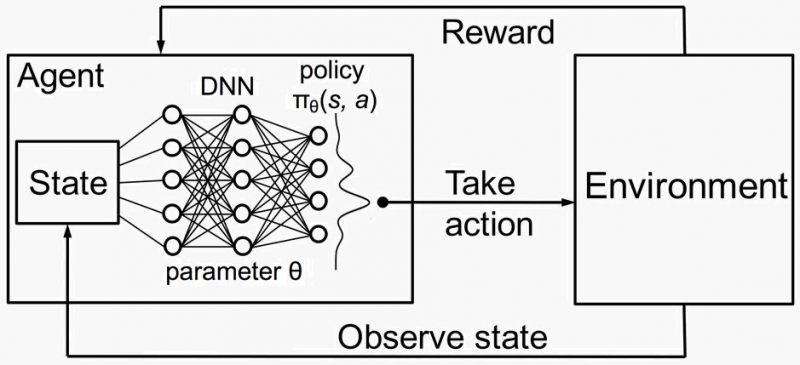

In [ ]:
SENp=0.00
SPEp=0.00
ACCp=0.00
AUCp=0.00
for z in range(5):
    X_train, X_test = Xtrain_10fold[z], Xtest_10fold[z]
    Y_train, Y_test = Ytrain_10fold[z], Ytest_10fold[z]
    Y_train_one_hot = keras.utils.to_categorical(Y_train, 2)

    Y_test_one_hot = keras.utils.to_categorical(Y_test, 2)
    # Define the gym environment.
    class LungCT(gym.Env):
        def __init__(self, width=50, height=50, channels=1, dataset=( X_train,  Y_train)):
            # Training dataset
            self.X, self.y = dataset

            # Reset the state index, used to step through dataset.
            self.idx = 0

            # LungCT images 2(benign and malignant) are valid actions.
            self.action_space = spaces.Discrete(2)

            '''The observation_space defines the structure of the observations your environment will be returning.
            Learning agents usually need to know this before they start running, in order to set up the policy function.
            Some general-purpose learning agents can handle a wide range of observation types: Discrete,
            Box, or pixels (which is usually a Box(0, 255, [height, width, 3]) for RGB pixels)'''

            self.observation_space = spaces.Box(low=0, high=1, shape=(width, height, channels), dtype=np.float32)
        def _obs(self):

            # Return a frame at the target dimensions from self.X at the current state index for the CnnPolicy.

            width, height, channels = (self.observation_space.shape[0],
                                      self.observation_space.shape[1],
                                      self.observation_space.shape[2])
            obs = self.X[self.idx]

            # Enlarge the observation if the dataset is smaller than the target canvas.
            if obs.shape[0] < width or obs.shape[1] < height:
                obs = cv2.resize(obs, (width, height), interpolation = cv2.INTER_CUBIC)
                obs = obs.reshape(width, height, channels)
            return obs

        def step(self, action):
            # The agent earns 1 point for a correct label.
            reward = 1 if action == self.y[self.idx] else 0

            # The state index increments at each step then wraps around at the end of the training dataset.
            self.idx = self.idx + 1 if self.idx < len(self.X) - 1 else 0

            # Return the observation, earned reward, terminal state, and info dict.
            #obs: The current observation of the environment
            return self._obs(), reward, self.idx == 0, {}
        def reset(self):

            # Reset the index to the beginning of the training dataset and return the initial observation.
            self.idx = 0
            return self._obs()

        def render(self, action='', mode='human', close=False):
            # Display the labeled observation.
            width, height = self.observation_space.shape[0], self.observation_space.shape[1]
            fig, ax = plt.subplots(1)
            ax.imshow(self._obs().reshape(width, height), cmap='Greys')

            # Label with the correct value and action if supplied.
            title = '{}-{}'.format(action, self.y[self.idx]) if action != '' else self.y[self.idx]
            ax.set_title(title)
            plt.show()


    # Load the custom gym into a vectorized environment.
    ''''''''''''''''Vectorized Environments are a method for stacking multiple independent environments into a single environment.
    Instead of training an RL agent on 1 environment per step, it allows us to train it on n environments per step.
    Because of this, actions passed to the environment are now a vector '''''''''

    env = DummyVecEnv([lambda: LungCT(width=50, height=50, channels=1, dataset=( X_train,  Y_train))])

    # Grab the observation shape for generating evaluation frames.
    width, height = env.observation_space.shape[0], env.observation_space.shape[1]



    def create_model(pretrained=False, save_model=True, epochs=1):
        model_name = "dqn_cnn_LungCT"

        # Return a pretrained model if the flag is set. Otherwise, train a new model.
        ''''This learning algorithm is called Deep Q-Network (DQN).
        The key idea in this development was thus to use deep neural networks to represent the
        Q-network and train this network to predict total reward.'''

        if pretrained:
            return DQN.load(model_name)

        # Create a model from a DQN agent with a CnnPolicy attached to a tensorboard logger.
        #Verbose is a general programming term for produce lots of logging output.
        #CnnPolicies are for images only. Policy object that implements actor critic, using a CNN (the nature CNN).

        # model = PPO2(CnnPolicy, env, verbose=0, tensorboard_log="LungCT./_log")
        model = DQN(LnCnnPolicy, env, verbose=0, tensorboard_log="LungCT./_log")

        # Train the model on several epochs through the full training dataset.
        # model.learn(total_timesteps=len(X_train)*epochs)
        model.learn(total_timesteps=len(X_train))

        # Save the new model if the flag is set.
        if save_model:
            model.save(r"/content/" + str(z) + ".h5")
            #model.save(model_name)

        return model
    #del model
    model = create_model(pretrained=False, save_model=True, epochs=1)


    # Evaluate the model by counting the total rewards attained on the test dataset.
    total_rewards = 0
    pred_cls=[]

    for idx in trange(len(X_test)):
        # Generate an evaluation observation frame.
        '''Interpolation is a niche technique to fill missing values.
        This should be used where there is a trend observed in the data and you want to fill the missing value along the same trend.'''

        obs = cv2.resize(X_test[idx], (width, height), interpolation = cv2.INTER_CUBIC)
        obs = obs.reshape(width, height, 1)

        # Predict an action based on the observation.
        action, _states = model.predict(obs)
        pred_cls.append(action)

        # Score the prediction.
        reward = 1 if action == Y_test[idx] else 0
        total_rewards += reward

    print('Accuracy: {:.2f}%'.format(total_rewards / len(X_test) * 100.0))




    TN, FP, FN, TP = confusion_matrix(Y_test, pred_cls).ravel()

    SEN=TP/(TP+FN)
    SPE=TN/(TN+FP)
    ACC=(TP+TN)/(TP+TN+FP+FN)

    fpr, tpr, thresholds = metrics.roc_curve(Y_test, pred_cls)
    AUC = metrics.auc(fpr, tpr)

    SENp=SENp+SEN
    SPEp=SPE+SPE
    ACCp=ACCp+ACC
    AUCp=AUCp+AUC

    print("SEN",SEN)
    print("SPE",SPE)
    print("ACC",ACC*100)
    print("AUC",AUC)
    del model
print("-----------------------")
print("AVG SEN",SENp/(z+1))
print("AVG SPE",SPEp/(z+1))
print("AVG ACC",(ACCp/(z+1))*100)
print("AVG AUC",AUCp/(z+1))








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





  0%|          | 0/600 [00:00<?, ?it/s]

Accuracy: 95.50%
SEN 0.9696969696969697
SPE 0.9405940594059405
ACC 95.5
AUC 0.9551455145514551
-----------------------
AVG SEN 0.9696969696969697
AVG SPE 1.881188118811881
AVG ACC 95.5
AVG AUC 0.9551455145514551
